### Import all Required Libraries.

In [280]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np
import pandas as pd
print("All Libraries are imported.")

All Libraries are imported.


In [281]:
df_survey = pd.read_csv('whether1.csv')

In [282]:
df_survey.head()

,District_name,Avg_rainfall,Avg_temperature
0,Ahemadnagar,345.0,24.0
1,Akola,602.0,27.0
2,Amravati,808.0,27.0
3,Aurangabad,741.0,26.0
4,Beed,692.0,29.0


In [283]:
# For consistency, ensure that all column labels of type string.
all(isinstance(column , str) for column in df_survey.columns)

True

In [284]:
df_survey.columns

Index(['District_name', 'Avg_rainfall', 'Avg_temperature'], dtype='object')

### Creating Bar Plot for the Average Rainfall.

In [285]:
df_rainfall = df_survey[['District_name','Avg_rainfall']]
df_rainfall.head()

,District_name,Avg_rainfall
0,Ahemadnagar,345.0
1,Akola,602.0
2,Amravati,808.0
3,Aurangabad,741.0
4,Beed,692.0


In [286]:
nan_value = float("NaN")
df_rainfall.replace("", nan_value, inplace=True)
df_rainfall.dropna(subset = ["District_name"], inplace=True)
df_rainfall.shape

c:\program files\python36\lib\site-packages\pandas\core\frame.py:4278: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(33, 2)

In [302]:
#Set the district name as index - useful for quickly looking up district using .loc method
df_rainfall.set_index('District_name' , inplace = True)



#now see how data frame looks.
df_rainfall.head()

,Avg_rainfall
District_name,
Ahemadnagar,345.0
Akola,602.0
Amravati,808.0
Aurangabad,741.0
Beed,692.0


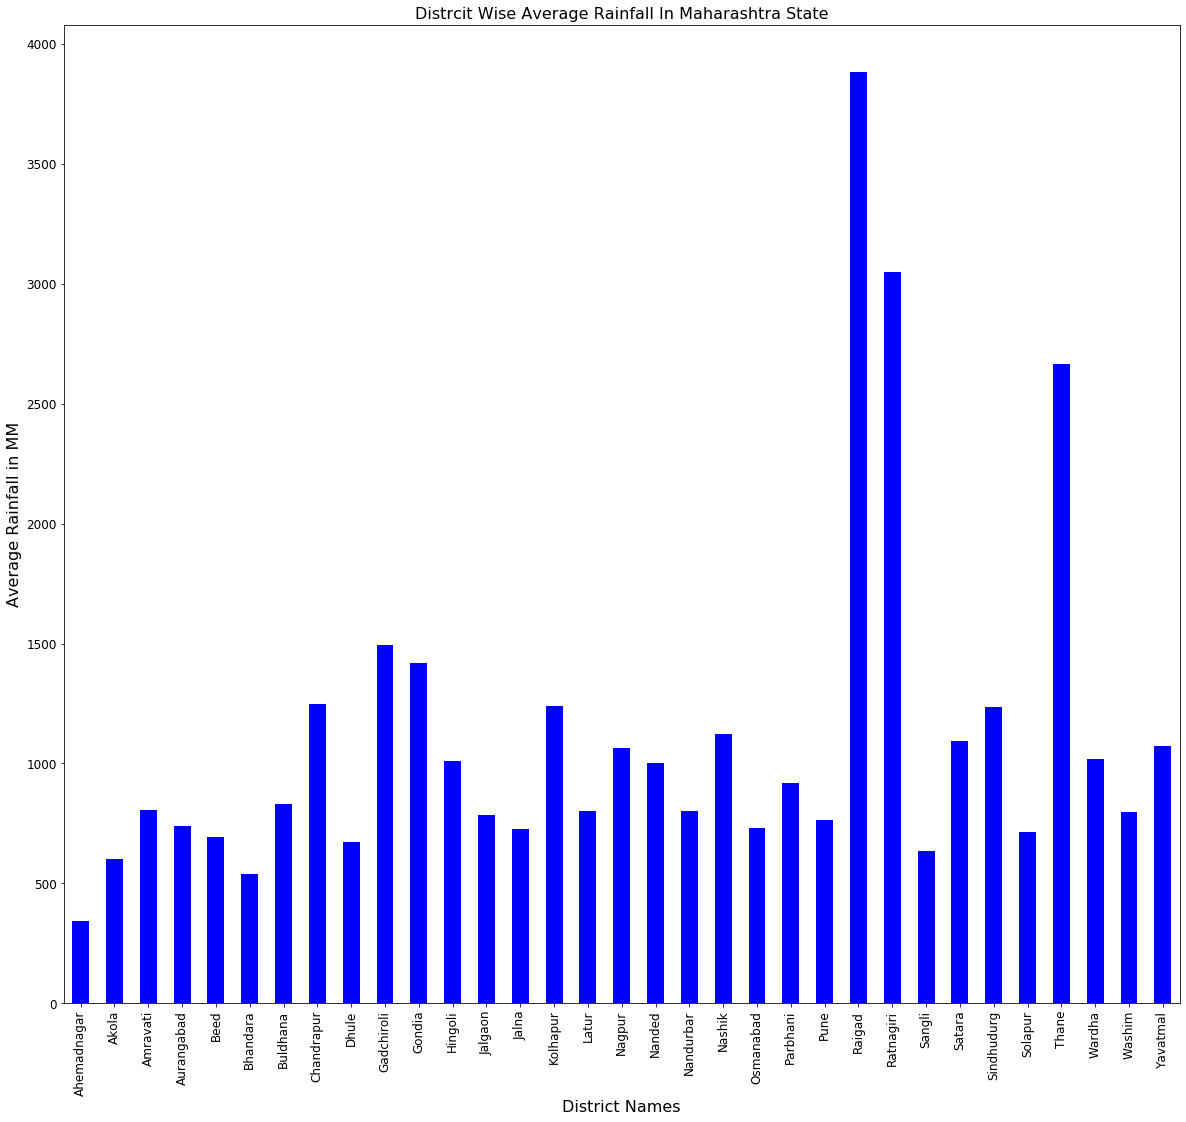

<Figure size 432x288 with 0 Axes>

In [303]:
df_rainfall['Avg_rainfall'].plot(kind="bar", figsize = (20,18),  fontsize = 12, color = '#0000ff')
plt.title("Distrcit Wise Average Rainfall In Maharashtra State", fontsize = 16)
plt.xlabel("District Names", fontsize = 16)
plt.ylabel("Average Rainfall in MM", fontsize = 16)

plt.show()

plt.savefig('rainfall_bar.png', format= 'png')


### Bar Plot for Average Temperature Data.

In [288]:
df_temp = df_survey[['District_name','Avg_temperature']]
df_temp.head()

,District_name,Avg_temperature
0,Ahemadnagar,24.0
1,Akola,27.0
2,Amravati,27.0
3,Aurangabad,26.0
4,Beed,29.0


In [289]:
nan_value = float("NaN")
df_temp.replace("", nan_value, inplace=True)
df_temp.dropna(subset = ["District_name"], inplace=True)
df_temp.shape

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(33, 2)

In [290]:
#Set the district name as index - useful for quickly looking up district using .loc method
df_temp.set_index('District_name' , inplace = True)

#now see how data frame looks.
df_temp.head()

,Avg_temperature
District_name,
Ahemadnagar,24.0
Akola,27.0
Amravati,27.0
Aurangabad,26.0
Beed,29.0


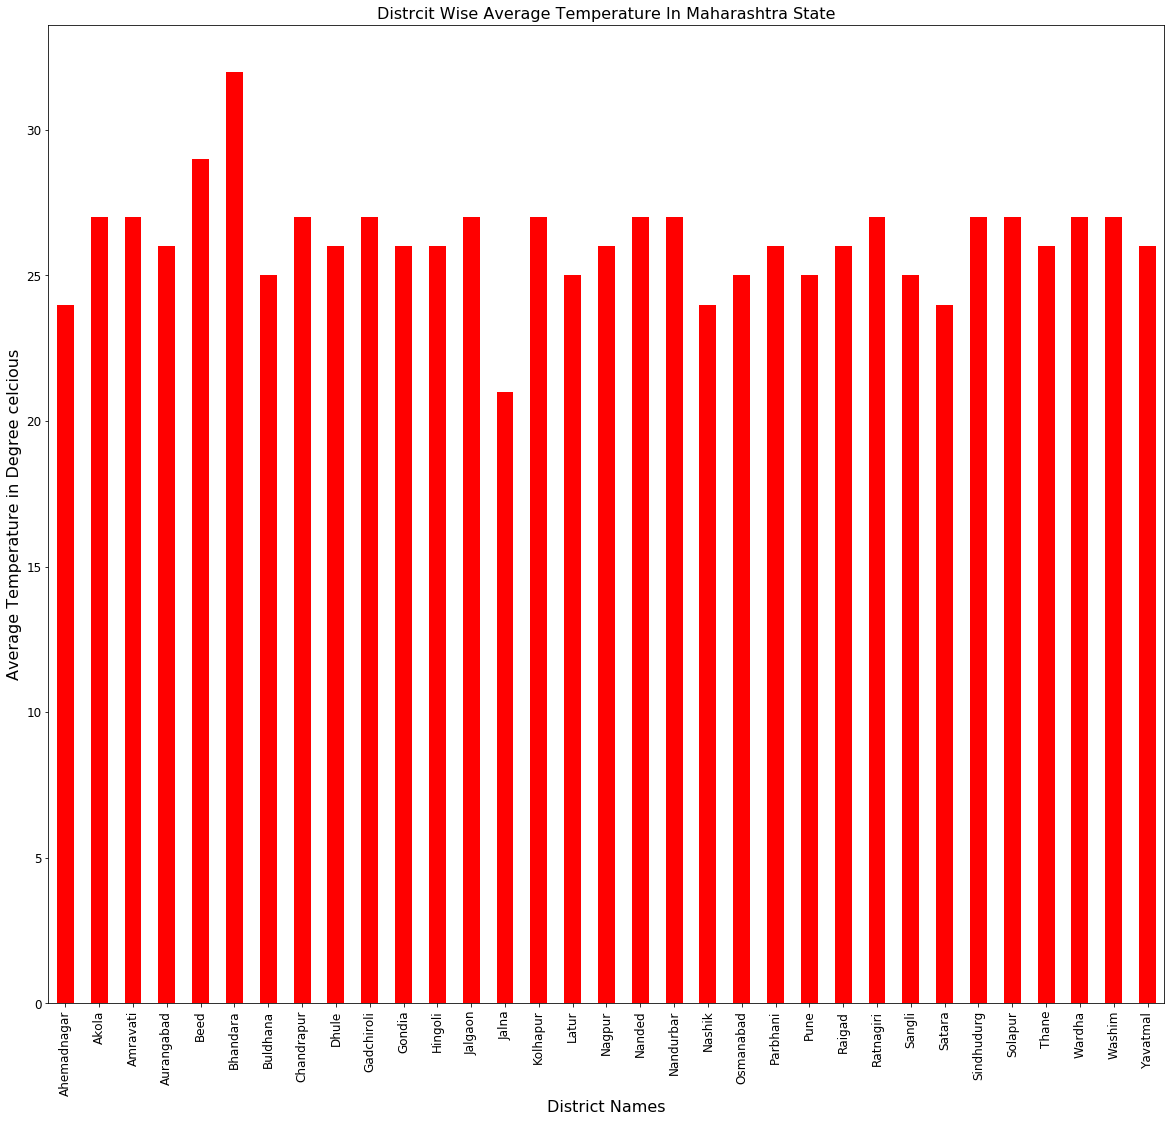

<Figure size 432x288 with 0 Axes>

In [291]:
df_temp['Avg_temperature'].plot(kind="bar", figsize = (20,18),  fontsize = 12, color = '#ff0000')
plt.title("Distrcit Wise Average Temperature In Maharashtra State", fontsize = 16)
plt.xlabel("District Names", fontsize = 16)
plt.ylabel("Average Temperature in Degree celcious", fontsize = 16)

plt.show()
plt.savefig('Temp.png',  format= 'png')

### Now lets Visualize rainfall in map.

In [301]:
import folium
#first create the map of maharashtra.
maha_map = folium.Map(location=[19.7515, 75.7139], zoom_start=7 )
maha_map